## Lab 4

### import library and tools function

In [1]:
# import nesscessary library
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift


### Question 1. Watershed

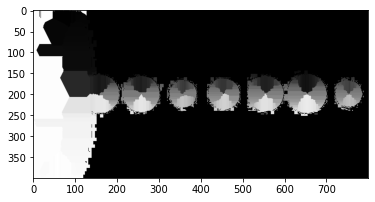

In [2]:
def watershed_processing(): 
    image = cv2.imread('./images/planets.jpg')
    # conver img to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(image, cmap='gray')

    # Convert to binary image
    # image = cv2.threshold(image, 20, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1] 
    
    # calculate the distance transform of the image
    distance = ndi.distance_transform_edt(image)
    # print(distance)
    coords = peak_local_max(distance, footprint=np.ones((3,3)), labels = image)
    # generate the markers
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = ndi.label(mask)
    # perform watershed on the image
    labels = watershed(-distance, markers, mask=image)

    plt.imshow(labels)

watershed_processing()

In [3]:
def meanshilt_processing():
    image = cv2.imread('./images/planets.jpg')
    flatten_image = np.array(image)[:, :, :3]
    
    R = flatten_image[:, :, 0]
    G = flatten_image[:, :, 1]
    B = flatten_image[:, :, 2]

    shape = R.shape
    color_sample = np.column_stack([R.flatten(), G.flatten(), B.flatten()])

    clf = MeanShift(bin_seeding= True, max_iter = 300)
    labels = clf.fit_predict(color_sample).reshape(shape)

    # plt.imshow(labels, cmap=plt.cm.gray)


meanshilt_processing()

(320000, 3)


In [ ]:
figs, axes = plt.subplots(ncols=3, figsize=(9,3), sharex = True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Image')
    ax[1].imshow(-distance, cmap=plt.cm.gray)
    ax[1].set_title('Distance')
    ax[2].imshow(labels, cmap=plt.cm.gray)
    ax[2].set_title('Watershed')